In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the CSV file
df = pd.read_csv('../RawDataResources/2023_State_MN_HMDA_loan_data(all loan_purpose).csv')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Display first few rows
print("\nFirst few rows:")
df.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132242 entries, 0 to 132241
Data columns (total 100 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   activity_year                             132242 non-null  int64  
 1   lei                                       132242 non-null  object 
 2   derived_msa-md                            132242 non-null  int64  
 3   state_code                                132242 non-null  object 
 4   county_code                               131447 non-null  float64
 5   county_name                               131447 non-null  object 
 6   census_tract                              131226 non-null  float64
 7   conforming_loan_limit                     131578 non-null  object 
 8   derived_loan_product_type                 132242 non-null  object 
 9   derived_dwelling_category                 132242 non-null  object 
 10  deriv

,activity_year,lei,derived_msa-md,state_code,county_code,county_name,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2023,254900FBWEZ3YUPOBN33,33460,MN,27123.0,Ramsey County,2.712303e+10,NaN,Conventional:First Lien,Multifamily:Site-Built,...,NaN,NaN,NaN,5330,73.21,124300,49.04,758,1133,60
1,2023,254900FBWEZ3YUPOBN33,33460,MN,27123.0,Ramsey County,2.712304e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,...,NaN,NaN,NaN,5135,24.42,124300,79.34,1296,1331,52
2,2023,254900FBWEZ3YUPOBN33,33460,MN,27123.0,Ramsey County,2.712303e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,...,NaN,NaN,NaN,2954,77.76,124300,51.10,473,768,0
3,2023,254900FBWEZ3YUPOBN33,33460,MN,27123.0,Ramsey County,2.712303e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,...,NaN,NaN,NaN,2767,34.30,124300,96.12,832,1056,0
4,2023,254900FBWEZ3YUPOBN33,33460,MN,27123.0,Ramsey County,2.712303e+10,NaN,Conventional:First Lien,Multifamily:Site-Built,...,NaN,NaN,NaN,4573,79.93,124300,41.59,508,1045,69


In [3]:
# Select only the specified columns based on the analysis requirements
columns_to_keep = [
    'activity_year', 'lei', 'state_code', 'county_name', 'conforming_loan_limit',
    'derived_dwelling_category', 'derived_ethnicity', 'derived_race', 'derived_sex',
    'action_taken', 'purchaser_type', 'preapproval', 'loan_type', 'loan_purpose',
    'lien_status', 'reverse_mortgage', 'open-end_line_of_credit', 'loan_amount',
    'loan_to_value_ratio', 'interest_rate', 'rate_spread', 'hoepa_status',
    'total_loan_costs', 'loan_term', 'property_value', 'income',
    'debt_to_income_ratio', 'applicant_race-1', 'applicant_sex',
    'denial_reason-1', 'tract_minority_population_percent'
]

# Create new dataframe with only selected columns
df_cleaned = df[columns_to_keep]

# Display info about cleaned dataset
print("Cleaned Dataset Info:")
print(df_cleaned.info())

# Display first few rows of cleaned dataset
print("\nFirst few rows of cleaned dataset:")
print(df_cleaned.head())

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132242 entries, 0 to 132241
Data columns (total 31 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   activity_year                      132242 non-null  int64  
 1   lei                                132242 non-null  object 
 2   state_code                         132242 non-null  object 
 3   county_name                        131447 non-null  object 
 4   conforming_loan_limit              131578 non-null  object 
 5   derived_dwelling_category          132242 non-null  object 
 6   derived_ethnicity                  132242 non-null  object 
 7   derived_race                       132242 non-null  object 
 8   derived_sex                        132242 non-null  object 
 9   action_taken                       132242 non-null  int64  
 10  purchaser_type                     132242 non-null  int64  
 11  preapproval      

In [4]:
df_cleaned.head(5)

,activity_year,lei,state_code,county_name,conforming_loan_limit,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,...,hoepa_status,total_loan_costs,loan_term,property_value,income,debt_to_income_ratio,applicant_race-1,applicant_sex,denial_reason-1,tract_minority_population_percent
0,2023,254900FBWEZ3YUPOBN33,MN,Ramsey County,NaN,Multifamily:Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,1,...,3,NaN,24,4955000,NaN,NaN,7.0,4,10,73.21
1,2023,254900FBWEZ3YUPOBN33,MN,Ramsey County,C,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,1,...,3,NaN,13,435000,NaN,NaN,7.0,4,10,24.42
2,2023,254900FBWEZ3YUPOBN33,MN,Ramsey County,C,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,1,...,3,NaN,360,455000,NaN,NaN,7.0,4,10,77.76
3,2023,254900FBWEZ3YUPOBN33,MN,Ramsey County,C,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,1,...,3,NaN,360,335000,NaN,NaN,7.0,4,10,34.30
4,2023,254900FBWEZ3YUPOBN33,MN,Ramsey County,NaN,Multifamily:Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,1,...,3,NaN,24,3645000,NaN,NaN,7.0,4,10,79.93


In [5]:
# Display total number of records
print(f"Total number of records: {len(df_cleaned)}")

# Display counts by state
print("\nRecords by state:")
print(df_cleaned['state_code'].value_counts())

# Display counts by county 
print("\nTop 10 counties by number of records:")
print(df_cleaned['county_name'].value_counts().head(10))

# Display counts by loan type
print("\nRecords by loan type:")
print(df_cleaned['loan_type'].value_counts())

# Display counts by action taken
print("\nRecords by action taken:")
print(df_cleaned['action_taken'].value_counts())


Total number of records: 132242

Records by state:
state_code
MN    132242
Name: count, dtype: int64

Top 10 counties by number of records:
county_name
Hennepin County      28259
Dakota County        11427
Ramsey County        10677
Anoka County          9847
Washington County     7649
Wright County         4618
St. Louis County      4300
Scott County          4071
Olmsted County        4000
Stearns County        3194
Name: count, dtype: int64

Records by loan type:
loan_type
1    115449
2     11505
3      4638
4       650
Name: count, dtype: int64

Records by action taken:
action_taken
1    109972
0     22270
Name: count, dtype: int64


In [6]:
df_cleaned.head(5)

,activity_year,lei,state_code,county_name,conforming_loan_limit,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,...,hoepa_status,total_loan_costs,loan_term,property_value,income,debt_to_income_ratio,applicant_race-1,applicant_sex,denial_reason-1,tract_minority_population_percent
0,2023,254900FBWEZ3YUPOBN33,MN,Ramsey County,NaN,Multifamily:Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,1,...,3,NaN,24,4955000,NaN,NaN,7.0,4,10,73.21
1,2023,254900FBWEZ3YUPOBN33,MN,Ramsey County,C,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,1,...,3,NaN,13,435000,NaN,NaN,7.0,4,10,24.42
2,2023,254900FBWEZ3YUPOBN33,MN,Ramsey County,C,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,1,...,3,NaN,360,455000,NaN,NaN,7.0,4,10,77.76
3,2023,254900FBWEZ3YUPOBN33,MN,Ramsey County,C,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,1,...,3,NaN,360,335000,NaN,NaN,7.0,4,10,34.30
4,2023,254900FBWEZ3YUPOBN33,MN,Ramsey County,NaN,Multifamily:Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,1,...,3,NaN,24,3645000,NaN,NaN,7.0,4,10,79.93


In [7]:
# Calculate total records
total_records = len(df_cleaned)

# Calculate missing value statistics
missing_stats = pd.DataFrame({
    'Missing Values': df_cleaned.isnull().sum(),
    'Total Records': total_records,
    'Missing Percentage': (df_cleaned.isnull().sum() / total_records * 100).round(2)
})

# Sort by missing percentage descending
missing_stats = missing_stats.sort_values('Missing Percentage', ascending=False)

print("\nMissing value analysis:")
print(f"\nTotal records: {total_records:,}")
print("\nMissing value statistics:")
print(missing_stats)

# Calculate denied loan statistics
denied_count = len(df_cleaned[df_cleaned['action_taken'] == 0])

print(f"\nDenied loan applications analysis:")
print(f"Number of denied applications: {denied_count:,}")
print(f"Total number of applications: {total_records:,}")



Missing value analysis:

Total records: 132,242

Missing value statistics:
                                   Missing Values  Total Records  \
total_loan_costs                            48450         132242   
rate_spread                                 27624         132242   
interest_rate                               22200         132242   
income                                       4932         132242   
loan_to_value_ratio                          4460         132242   
debt_to_income_ratio                         3229         132242   
property_value                               1766         132242   
loan_term                                    1529         132242   
county_name                                   795         132242   
conforming_loan_limit                         664         132242   
applicant_race-1                               11         132242   
activity_year                                   0         132242   
loan_amount                             

In [8]:
# Drop records with missing interest rates and income
df_cleaned = df_cleaned.dropna(subset=['total_loan_costs', 'rate_spread'])

# Calculate missing value counts and percentages for each column
total_records = len(df_cleaned)
missing_stats = pd.DataFrame({
    'Missing Values': df_cleaned.isnull().sum(),
    'Total Records': total_records,
    'Missing Percentage': (df_cleaned.isnull().sum() / total_records * 100).round(2)
})

# Sort by missing percentage descending
missing_stats = missing_stats.sort_values('Missing Percentage', ascending=False)

print("\nMissing value analysis after dropping records with missing interest rates and income:")
print("\nTotal records remaining:", total_records)
print("\nMissing value statistics:")
print(missing_stats)

# Calculate and display number of denied records
denied_count = len(df_cleaned[df_cleaned['action_taken'] == 0])
total_count = len(df_cleaned)

# Calculate accepted number of records
accepted_count = total_count - denied_count

print(f"\nDenied loan applications analysis:")
print(f"Number of denied applications: {denied_count:,}")
print(f"Total number of applications: {total_count:,}")


Missing value analysis after dropping records with missing interest rates and income:

Total records remaining: 82079

Missing value statistics:
                                   Missing Values  Total Records  \
income                                       2571          82079   
loan_to_value_ratio                           799          82079   
county_name                                   397          82079   
conforming_loan_limit                         297          82079   
debt_to_income_ratio                          157          82079   
property_value                                 56          82079   
interest_rate                                  26          82079   
loan_term                                      18          82079   
applicant_race-1                                6          82079   
activity_year                                   0          82079   
loan_amount                                     0          82079   
denial_reason-1                       

In [9]:
# Drop records with missing interest rates and income
df_cleaned = df_cleaned.dropna(subset=['income'])

# Calculate missing value counts and percentages for each column
total_records = len(df_cleaned)
missing_stats = pd.DataFrame({
    'Missing Values': df_cleaned.isnull().sum(),
    'Total Records': total_records,
    'Missing Percentage': (df_cleaned.isnull().sum() / total_records * 100).round(2)
})

# Sort by missing percentage descending
missing_stats = missing_stats.sort_values('Missing Percentage', ascending=False)

print("\nMissing value analysis after dropping records with missing interest rates and income:")
print("\nTotal records remaining:", total_records)
print("\nMissing value statistics:")
print(missing_stats)

# Calculate and display number of denied records
denied_count = len(df_cleaned[df_cleaned['action_taken'] == 0])
total_count = len(df_cleaned)

# Calculate accepted number of records
accepted_count = total_count - denied_count

print(f"\nDenied loan applications analysis:")
print(f"Number of denied applications: {denied_count:,}")
print(f"Total number of applications: {total_count:,}")


Missing value analysis after dropping records with missing interest rates and income:

Total records remaining: 79508

Missing value statistics:
                                   Missing Values  Total Records  \
loan_to_value_ratio                           781          79508   
county_name                                   361          79508   
debt_to_income_ratio                           46          79508   
property_value                                 41          79508   
conforming_loan_limit                          29          79508   
interest_rate                                  26          79508   
loan_term                                      18          79508   
applicant_race-1                                6          79508   
activity_year                                   0          79508   
loan_amount                                     0          79508   
denial_reason-1                                 0          79508   
applicant_sex                         

In [10]:
# Drop records with missing interest rates and income
df_cleaned = df_cleaned.dropna(subset=['loan_to_value_ratio'])

# Calculate missing value counts and percentages for each column
total_records = len(df_cleaned)
missing_stats = pd.DataFrame({
    'Missing Values': df_cleaned.isnull().sum(),
    'Total Records': total_records,
    'Missing Percentage': (df_cleaned.isnull().sum() / total_records * 100).round(2)
})

# Sort by missing percentage descending
missing_stats = missing_stats.sort_values('Missing Percentage', ascending=False)

print("\nMissing value analysis after dropping records with missing interest rates and income:")
print("\nTotal records remaining:", total_records)
print("\nMissing value statistics:")
print(missing_stats)

# Calculate and display number of denied records
denied_count = len(df_cleaned[df_cleaned['action_taken'] == 0])
total_count = len(df_cleaned)

# Calculate accepted number of records
accepted_count = total_count - denied_count

print(f"\nDenied loan applications analysis:")
print(f"Number of denied applications: {denied_count:,}")
print(f"Total number of applications: {total_count:,}")


Missing value analysis after dropping records with missing interest rates and income:

Total records remaining: 78727

Missing value statistics:
                                   Missing Values  Total Records  \
county_name                                   361          78727   
conforming_loan_limit                          29          78727   
debt_to_income_ratio                           22          78727   
interest_rate                                  22          78727   
loan_term                                      18          78727   
applicant_race-1                                6          78727   
property_value                                 11          78727   
activity_year                                   0          78727   
loan_amount                                     0          78727   
denial_reason-1                                 0          78727   
applicant_sex                                   0          78727   
income                                

In [11]:
# Drop records with missing interest rates and income
df_cleaned = df_cleaned.dropna(subset=['county_name'])

# Calculate missing value counts and percentages for each column
total_records = len(df_cleaned)
missing_stats = pd.DataFrame({
    'Missing Values': df_cleaned.isnull().sum(),
    'Total Records': total_records,
    'Missing Percentage': (df_cleaned.isnull().sum() / total_records * 100).round(2)
})

# Sort by missing percentage descending
missing_stats = missing_stats.sort_values('Missing Percentage', ascending=False)

print("\nMissing value analysis after dropping records with missing interest rates and income:")
print("\nTotal records remaining:", total_records)
print("\nMissing value statistics:")
print(missing_stats)

# Calculate and display number of denied records
denied_count = len(df_cleaned[df_cleaned['action_taken'] == 0])
total_count = len(df_cleaned)

# Calculate accepted number of records
accepted_count = total_count - denied_count

print(f"\nDenied loan applications analysis:")
print(f"Number of denied applications: {denied_count:,}")
print(f"Total number of applications: {total_count:,}")


Missing value analysis after dropping records with missing interest rates and income:

Total records remaining: 78366

Missing value statistics:
                                   Missing Values  Total Records  \
conforming_loan_limit                          27          78366   
debt_to_income_ratio                           22          78366   
interest_rate                                  22          78366   
loan_term                                      18          78366   
applicant_race-1                                6          78366   
property_value                                 11          78366   
activity_year                                   0          78366   
open-end_line_of_credit                         0          78366   
denial_reason-1                                 0          78366   
applicant_sex                                   0          78366   
income                                          0          78366   
total_loan_costs                      

In [12]:
# Drop records with missing interest rates and income
df_cleaned = df_cleaned.dropna(subset=['conforming_loan_limit', 'debt_to_income_ratio'])

# Calculate missing value counts and percentages for each column
total_records = len(df_cleaned)
missing_stats = pd.DataFrame({
    'Missing Values': df_cleaned.isnull().sum(),
    'Total Records': total_records,
    'Missing Percentage': (df_cleaned.isnull().sum() / total_records * 100).round(2)
})

# Sort by missing percentage descending
missing_stats = missing_stats.sort_values('Missing Percentage', ascending=False)

print("\nMissing value analysis after dropping records with missing interest rates and income:")
print("\nTotal records remaining:", total_records)
print("\nMissing value statistics:")
print(missing_stats)

# Calculate and display number of denied records
denied_count = len(df_cleaned[df_cleaned['action_taken'] == 0])
total_count = len(df_cleaned)

# Calculate accepted number of records
accepted_count = total_count - denied_count

print(f"\nDenied loan applications analysis:")
print(f"Number of denied applications: {denied_count:,}")
print(f"Total number of applications: {total_count:,}")


Missing value analysis after dropping records with missing interest rates and income:

Total records remaining: 78317

Missing value statistics:
                                   Missing Values  Total Records  \
loan_term                                      18          78317   
interest_rate                                  14          78317   
applicant_race-1                                6          78317   
property_value                                 11          78317   
activity_year                                   0          78317   
open-end_line_of_credit                         0          78317   
denial_reason-1                                 0          78317   
applicant_sex                                   0          78317   
debt_to_income_ratio                            0          78317   
income                                          0          78317   
total_loan_costs                                0          78317   
hoepa_status                          

In [13]:
# Drop records with missing interest rates and income
df_cleaned = df_cleaned.dropna(subset=['loan_term', 'interest_rate' ])

# Calculate missing value counts and percentages for each column
total_records = len(df_cleaned)
missing_stats = pd.DataFrame({
    'Missing Values': df_cleaned.isnull().sum(),
    'Total Records': total_records,
    'Missing Percentage': (df_cleaned.isnull().sum() / total_records * 100).round(2)
})

# Sort by missing percentage descending
missing_stats = missing_stats.sort_values('Missing Percentage', ascending=False)

print("\nMissing value analysis after dropping records with missing interest rates and income:")
print("\nTotal records remaining:", total_records)
print("\nMissing value statistics:")
print(missing_stats)

# Calculate and display number of denied records
denied_count = len(df_cleaned[df_cleaned['action_taken'] == 0])
total_count = len(df_cleaned)

# Calculate accepted number of records
accepted_count = total_count - denied_count

print(f"\nDenied loan applications analysis:")
print(f"Number of denied applications: {denied_count:,}")
print(f"Total number of applications: {total_count:,}")


Missing value analysis after dropping records with missing interest rates and income:

Total records remaining: 78285

Missing value statistics:
                                   Missing Values  Total Records  \
applicant_race-1                                6          78285   
property_value                                 11          78285   
activity_year                                   0          78285   
open-end_line_of_credit                         0          78285   
denial_reason-1                                 0          78285   
applicant_sex                                   0          78285   
debt_to_income_ratio                            0          78285   
income                                          0          78285   
loan_term                                       0          78285   
total_loan_costs                                0          78285   
hoepa_status                                    0          78285   
rate_spread                           

In [14]:
# Drop records with missing interest rates and income
df_cleaned = df_cleaned.dropna(subset=['property_value'])

# Calculate missing value counts and percentages for each column
total_records = len(df_cleaned)
missing_stats = pd.DataFrame({
    'Missing Values': df_cleaned.isnull().sum(),
    'Total Records': total_records,
    'Missing Percentage': (df_cleaned.isnull().sum() / total_records * 100).round(2)
})

# Sort by missing percentage descending
missing_stats = missing_stats.sort_values('Missing Percentage', ascending=False)

print("\nMissing value analysis after dropping records with missing interest rates and income:")
print("\nTotal records remaining:", total_records)
print("\nMissing value statistics:")
print(missing_stats)

# Calculate and display number of denied records
denied_count = len(df_cleaned[df_cleaned['action_taken'] == 0])
total_count = len(df_cleaned)

# Calculate accepted number of records
accepted_count = total_count - denied_count

print(f"\nDenied loan applications analysis:")
print(f"Number of denied applications: {denied_count:,}")
print(f"Total number of applications: {total_count:,}")


Missing value analysis after dropping records with missing interest rates and income:

Total records remaining: 78274

Missing value statistics:
                                   Missing Values  Total Records  \
applicant_race-1                                6          78274   
activity_year                                   0          78274   
open-end_line_of_credit                         0          78274   
denial_reason-1                                 0          78274   
applicant_sex                                   0          78274   
debt_to_income_ratio                            0          78274   
income                                          0          78274   
property_value                                  0          78274   
loan_term                                       0          78274   
total_loan_costs                                0          78274   
hoepa_status                                    0          78274   
rate_spread                           

In [15]:
# Drop records with missing interest rates and income
df_cleaned = df_cleaned.dropna(subset=['applicant_race-1'])

# Calculate missing value counts and percentages for each column
total_records = len(df_cleaned)
missing_stats = pd.DataFrame({
    'Missing Values': df_cleaned.isnull().sum(),
    'Total Records': total_records,
    'Missing Percentage': (df_cleaned.isnull().sum() / total_records * 100).round(2)
})

# Sort by missing percentage descending
missing_stats = missing_stats.sort_values('Missing Percentage', ascending=False)

print("\nMissing value analysis after dropping records with missing interest rates and income:")
print("\nTotal records remaining:", total_records)
print("\nMissing value statistics:")
print(missing_stats)

# Calculate and display number of denied records
denied_count = len(df_cleaned[df_cleaned['action_taken'] == 0])
total_count = len(df_cleaned)

# Calculate accepted number of records
accepted_count = total_count - denied_count

print(f"\nDenied loan applications analysis:")
print(f"Number of denied applications: {denied_count:,}")
print(f"Total number of applications: {total_count:,}")


Missing value analysis after dropping records with missing interest rates and income:

Total records remaining: 78268

Missing value statistics:
                                   Missing Values  Total Records  \
activity_year                                   0          78268   
open-end_line_of_credit                         0          78268   
denial_reason-1                                 0          78268   
applicant_sex                                   0          78268   
applicant_race-1                                0          78268   
debt_to_income_ratio                            0          78268   
income                                          0          78268   
property_value                                  0          78268   
loan_term                                       0          78268   
total_loan_costs                                0          78268   
hoepa_status                                    0          78268   
rate_spread                           

In [16]:
# Check for 'Exempt' values in each column
exempt_counts = {}

for column in df_cleaned.columns:
    # Convert to string to handle numeric columns
    exempt_count = df_cleaned[column].astype(str).str.contains('Exempt', case=False).sum()
    if exempt_count > 0:
        exempt_counts[column] = exempt_count

print("\nColumns containing 'Exempt' values:")
if exempt_counts:
    for col, count in exempt_counts.items():
        print(f"{col}: {count:,} exempt values")
else:
    print("No 'Exempt' values found in any column")



Columns containing 'Exempt' values:
loan_to_value_ratio: 6,180 exempt values
interest_rate: 6,180 exempt values
rate_spread: 6,184 exempt values
total_loan_costs: 6,180 exempt values
loan_term: 6,180 exempt values
property_value: 6,180 exempt values
debt_to_income_ratio: 6,180 exempt values


In [17]:
# Remove records where rate_spread is 'Exempt' - financial institutions not required to report to HMDA

# Regulatory Exemptions and Data Collection Notes:
# - Small lenders below certain thresholds may be exempt from HMDA reporting requirements
# - Business-purpose loans secured by residential property may not require demographic data
# - Non-applicable fields may show as "exempt" (e.g. property data for non-dwelling loans)
# - Privacy protections allow omission of personal data not critical for underwriting
# - HMDA exemptions apply to small-volume lenders and reduced scope reporting fields
# - Fields marked "exempt" indicate institution not required to report that data point

df_cleaned_exempt = df_cleaned[df_cleaned['rate_spread'] != 'Exempt']

# Check for denied loans (action_taken = 0) after removing Exempt rate_spread
denied_after_exempt = df_cleaned_exempt[df_cleaned_exempt['action_taken'] == 0]

print("\nAfter removing records with 'Exempt' rate_spread:")
print(f"Number of denied applications (action_taken = 0): {len(denied_after_exempt):,}")
print(f"Total number of applications: {len(df_cleaned):,}")
print(f"Percentage of denied applications: {(len(denied_after_exempt)/len(df_cleaned)*100):.2f}%")



After removing records with 'Exempt' rate_spread:
Number of denied applications (action_taken = 0): 0
Total number of applications: 78,268
Percentage of denied applications: 0.00%


In [18]:
# Remove columns with 'Exempt' values
columns_to_drop = ['loan_to_value_ratio', 'interest_rate', 'rate_spread', 
                  'total_loan_costs', 'loan_term', 'property_value', 'debt_to_income_ratio']

df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Display remaining columns and their datatypes
print("\nRemaining columns and their datatypes:")
print(df_cleaned.dtypes)

# Display total number of columns
print(f"\nTotal number of remaining columns: {len(df_cleaned.columns)}")

# Get counts after column removal
denied_count = len(df_cleaned[df_cleaned['action_taken'] == 0])
total_count = len(df_cleaned)

print(f"\nAfter removing columns with 'Exempt' values:")
print(f"Number of denied applications: {denied_count:,}")
print(f"Total number of applications: {total_count:,}")
print(f"Percentage of denied applications: {(denied_count/total_count*100):.2f}%")



Remaining columns and their datatypes:
activity_year                          int64
lei                                   object
state_code                            object
county_name                           object
conforming_loan_limit                 object
derived_dwelling_category             object
derived_ethnicity                     object
derived_race                          object
derived_sex                           object
action_taken                           int64
purchaser_type                         int64
preapproval                            int64
loan_type                              int64
loan_purpose                           int64
lien_status                            int64
reverse_mortgage                       int64
open-end_line_of_credit                int64
loan_amount                          float64
hoepa_status                           int64
income                               float64
applicant_race-1                     float64
applicant_sex  

In [19]:
df_cleaned.head(5)

,activity_year,lei,state_code,county_name,conforming_loan_limit,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,...,lien_status,reverse_mortgage,open-end_line_of_credit,loan_amount,hoepa_status,income,applicant_race-1,applicant_sex,denial_reason-1,tract_minority_population_percent
8,2023,254900FKD0CVFUC78457,MN,Anoka County,C,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Asian,Male,1,...,1,1111,1111,185000.0,2,52.0,2.0,1,1111,10.74
11,2023,254900FKD0CVFUC78457,MN,St. Louis County,C,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,1,...,1,1111,1111,55000.0,2,58.0,5.0,2,1111,6.68
12,2023,254900FKD0CVFUC78457,MN,St. Louis County,C,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,1,1111,1111,715000.0,2,337.0,5.0,1,1111,5.94
13,2023,254900FKD0CVFUC78457,MN,St. Louis County,C,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,1,1111,1111,105000.0,2,169.0,5.0,1,1111,10.24
16,2023,254900FKD0CVFUC78457,MN,St. Louis County,C,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,1,1111,1111,55000.0,3,93.0,5.0,1,1111,6.11


In [20]:
# Convert datatypes according to ConvertedDtype specifications
df_cleaned = df_cleaned.astype({
    'activity_year': 'int64',
    'lei': 'object', 
    'state_code': 'object',
    'county_name': 'object',
    'conforming_loan_limit': 'object',
    'derived_dwelling_category': 'object',
    'derived_ethnicity': 'object', 
    'derived_race': 'object',
    'derived_sex': 'object',
    'action_taken': 'int64',
    'purchaser_type': 'int64',
    'preapproval': 'int64',
    'loan_type': 'int64',
    'loan_purpose': 'int64', 
    'lien_status': 'int64',
    'reverse_mortgage': 'int64',
    'open-end_line_of_credit': 'int64',
    'loan_amount': 'float64',
    'hoepa_status': 'int64',
    'income': 'float64',
    'applicant_race-1': 'int64',
    'applicant_sex': 'int64',
    'denial_reason-1': 'int64',
    'tract_minority_population_percent': 'float64'
})

# Display updated datatypes
print("\nUpdated Dataset Info:")
print(df_cleaned.dtypes)


Updated Dataset Info:
activity_year                          int64
lei                                   object
state_code                            object
county_name                           object
conforming_loan_limit                 object
derived_dwelling_category             object
derived_ethnicity                     object
derived_race                          object
derived_sex                           object
action_taken                           int64
purchaser_type                         int64
preapproval                            int64
loan_type                              int64
loan_purpose                           int64
lien_status                            int64
reverse_mortgage                       int64
open-end_line_of_credit                int64
loan_amount                          float64
hoepa_status                           int64
income                               float64
applicant_race-1                       int64
applicant_sex                   

In [21]:
df_cleaned.head(5)

,activity_year,lei,state_code,county_name,conforming_loan_limit,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,...,lien_status,reverse_mortgage,open-end_line_of_credit,loan_amount,hoepa_status,income,applicant_race-1,applicant_sex,denial_reason-1,tract_minority_population_percent
8,2023,254900FKD0CVFUC78457,MN,Anoka County,C,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Asian,Male,1,...,1,1111,1111,185000.0,2,52.0,2,1,1111,10.74
11,2023,254900FKD0CVFUC78457,MN,St. Louis County,C,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,1,...,1,1111,1111,55000.0,2,58.0,5,2,1111,6.68
12,2023,254900FKD0CVFUC78457,MN,St. Louis County,C,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,1,1111,1111,715000.0,2,337.0,5,1,1111,5.94
13,2023,254900FKD0CVFUC78457,MN,St. Louis County,C,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,1,1111,1111,105000.0,2,169.0,5,1,1111,10.24
16,2023,254900FKD0CVFUC78457,MN,St. Louis County,C,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,1,1111,1111,55000.0,3,93.0,5,1,1111,6.11


In [22]:
# Map conforming loan limit values to their full string descriptions
loan_limit_map = {
    'C': 'Conforming',
    'NC': 'Nonconforming', 
    'U': 'Undetermined',
    'NA': 'Not Applicable'
}

# Replace values using map
df_cleaned['conforming_loan_limit'] = df_cleaned['conforming_loan_limit'].map(loan_limit_map)

# Verify the changes
print("\nUnique values in conforming_loan_limit after mapping:")
print(df_cleaned['conforming_loan_limit'].unique())



Unique values in conforming_loan_limit after mapping:
['Conforming' 'Nonconforming']


In [21]:
df_cleaned.head(5)

,activity_year,lei,state_code,county_name,conforming_loan_limit,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,...,lien_status,reverse_mortgage,open-end_line_of_credit,loan_amount,hoepa_status,income,applicant_race-1,applicant_sex,denial_reason-1,tract_minority_population_percent
8,2023,254900FKD0CVFUC78457,MN,Anoka County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Asian,Male,1,...,1,1111,1111,185000.0,2,52.0,2.0,1,1111,10.74
11,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,1,...,1,1111,1111,55000.0,2,58.0,5.0,2,1111,6.68
12,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,1,1111,1111,715000.0,2,337.0,5.0,1,1111,5.94
13,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,1,1111,1111,105000.0,2,169.0,5.0,1,1111,10.24
16,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,1,1111,1111,55000.0,3,93.0,5.0,1,1111,6.11


In [23]:
# Map purchaser_type values to their descriptions
purchaser_type_map = {
    0: 'Not applicable',
    1: 'Fannie Mae', 
    2: 'Ginnie Mae',
    3: 'Freddie Mac',
    4: 'Farmer Mac',
    5: 'Private securitizer',
    6: 'Commercial bank, savings bank, or savings association',
    71: 'Credit union, mortgage company, or finance company',
    72: 'Life insurance company', 
    8: 'Affiliate institution',
    9: 'Other type of purchaser'
}

# Replace values using map and convert to string type
df_cleaned['purchaser_type'] = df_cleaned['purchaser_type'].map(purchaser_type_map).astype(str)

# Verify the changes
print("\nUnique values in purchaser_type after mapping:")
print(df_cleaned['purchaser_type'].unique())

# shows the dataframe with the new purchaser_type values
df_cleaned.head(5)




Unique values in purchaser_type after mapping:
['Not applicable' 'Fannie Mae' 'Other type of purchaser'
 'Credit union, mortgage company, or finance company'
 'Commercial bank, savings bank, or savings association' 'Freddie Mac'
 'Affiliate institution' 'Ginnie Mae' 'Life insurance company'
 'Private securitizer']


,activity_year,lei,state_code,county_name,conforming_loan_limit,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,...,lien_status,reverse_mortgage,open-end_line_of_credit,loan_amount,hoepa_status,income,applicant_race-1,applicant_sex,denial_reason-1,tract_minority_population_percent
8,2023,254900FKD0CVFUC78457,MN,Anoka County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Asian,Male,1,...,1,1111,1111,185000.0,2,52.0,2,1,1111,10.74
11,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,1,...,1,1111,1111,55000.0,2,58.0,5,2,1111,6.68
12,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,1,1111,1111,715000.0,2,337.0,5,1,1111,5.94
13,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,1,1111,1111,105000.0,2,169.0,5,1,1111,10.24
16,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,1,1111,1111,55000.0,3,93.0,5,1,1111,6.11


In [24]:
# Map preapproval values to their descriptions
preapproval_map = {
    1: 'Preapproval requested',
    2: 'Preapproval not requested'
}

# Replace values using map and convert to string type
df_cleaned['preapproval'] = df_cleaned['preapproval'].map(preapproval_map).astype(str)

# Verify the changes
print("\nUnique values in preapproval after mapping:")
print(df_cleaned['preapproval'].unique())

# Show the dataframe with the new preapproval values
df_cleaned.head(5)



Unique values in preapproval after mapping:
['Preapproval not requested' 'Preapproval requested']


,activity_year,lei,state_code,county_name,conforming_loan_limit,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,...,lien_status,reverse_mortgage,open-end_line_of_credit,loan_amount,hoepa_status,income,applicant_race-1,applicant_sex,denial_reason-1,tract_minority_population_percent
8,2023,254900FKD0CVFUC78457,MN,Anoka County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Asian,Male,1,...,1,1111,1111,185000.0,2,52.0,2,1,1111,10.74
11,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,1,...,1,1111,1111,55000.0,2,58.0,5,2,1111,6.68
12,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,1,1111,1111,715000.0,2,337.0,5,1,1111,5.94
13,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,1,1111,1111,105000.0,2,169.0,5,1,1111,10.24
16,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,1,1111,1111,55000.0,3,93.0,5,1,1111,6.11


In [25]:
# Map loan_type values to their descriptions
loan_type_map = {
    1: 'Conventional (not insured or guaranteed by FHA, VA, RHS, or FSA)',
    2: 'Federal Housing Administration insured (FHA)', 
    3: 'Veterans Affairs guaranteed (VA)',
    4: 'USDA Rural Housing Service or Farm Service Agency guaranteed (RHS or FSA)'
}

# Replace values using map and convert to string type
df_cleaned['loan_type'] = df_cleaned['loan_type'].map(loan_type_map).astype(str)

# Verify the changes
print("\nUnique values in loan_type after mapping:")
print(df_cleaned['loan_type'].unique())

# Show the dataframe with the new loan_type values
df_cleaned.head(5)



Unique values in loan_type after mapping:
['Conventional (not insured or guaranteed by FHA, VA, RHS, or FSA)'
 'Federal Housing Administration insured (FHA)'
 'Veterans Affairs guaranteed (VA)'
 'USDA Rural Housing Service or Farm Service Agency guaranteed (RHS or FSA)']


,activity_year,lei,state_code,county_name,conforming_loan_limit,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,...,lien_status,reverse_mortgage,open-end_line_of_credit,loan_amount,hoepa_status,income,applicant_race-1,applicant_sex,denial_reason-1,tract_minority_population_percent
8,2023,254900FKD0CVFUC78457,MN,Anoka County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Asian,Male,1,...,1,1111,1111,185000.0,2,52.0,2,1,1111,10.74
11,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,1,...,1,1111,1111,55000.0,2,58.0,5,2,1111,6.68
12,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,1,1111,1111,715000.0,2,337.0,5,1,1111,5.94
13,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,1,1111,1111,105000.0,2,169.0,5,1,1111,10.24
16,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,1,1111,1111,55000.0,3,93.0,5,1,1111,6.11


In [26]:
# Map loan_purpose values to their descriptions
loan_purpose_map = {
    1: 'Home purchase',
    2: 'Home improvement', 
    31: 'Refinancing',
    32: 'Cash-out refinancing',
    4: 'Other purpose',
    5: 'Not applicable'
}

# Replace values using map and convert to string type
df_cleaned['loan_purpose'] = df_cleaned['loan_purpose'].map(loan_purpose_map).astype(str)

# Verify the changes
print("\nUnique values in loan_purpose after mapping:")
print(df_cleaned['loan_purpose'].unique())

# Show the dataframe with the new loan_purpose values
df_cleaned.head(5)



Unique values in loan_purpose after mapping:
['Home purchase' 'Refinancing' 'Home improvement' 'Other purpose'
 'Cash-out refinancing']


,activity_year,lei,state_code,county_name,conforming_loan_limit,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,...,lien_status,reverse_mortgage,open-end_line_of_credit,loan_amount,hoepa_status,income,applicant_race-1,applicant_sex,denial_reason-1,tract_minority_population_percent
8,2023,254900FKD0CVFUC78457,MN,Anoka County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Asian,Male,1,...,1,1111,1111,185000.0,2,52.0,2,1,1111,10.74
11,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,1,...,1,1111,1111,55000.0,2,58.0,5,2,1111,6.68
12,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,1,1111,1111,715000.0,2,337.0,5,1,1111,5.94
13,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,1,1111,1111,105000.0,2,169.0,5,1,1111,10.24
16,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,1,1111,1111,55000.0,3,93.0,5,1,1111,6.11


In [27]:
# Map lien_status values to their descriptions
lien_status_map = {
    1: 'Secured by a first lien',
    2: 'Secured by a subordinate lien'
}

# Replace values using map and convert to string type
df_cleaned['lien_status'] = df_cleaned['lien_status'].map(lien_status_map).astype(str)

# Verify the changes
print("\nUnique values in lien_status after mapping:")
print(df_cleaned['lien_status'].unique())

# Show the dataframe with the new lien_status values
df_cleaned.head(5)



Unique values in lien_status after mapping:
['Secured by a first lien' 'Secured by a subordinate lien']


,activity_year,lei,state_code,county_name,conforming_loan_limit,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,...,lien_status,reverse_mortgage,open-end_line_of_credit,loan_amount,hoepa_status,income,applicant_race-1,applicant_sex,denial_reason-1,tract_minority_population_percent
8,2023,254900FKD0CVFUC78457,MN,Anoka County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Asian,Male,1,...,Secured by a first lien,1111,1111,185000.0,2,52.0,2,1,1111,10.74
11,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,1,...,Secured by a first lien,1111,1111,55000.0,2,58.0,5,2,1111,6.68
12,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,Secured by a first lien,1111,1111,715000.0,2,337.0,5,1,1111,5.94
13,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,Secured by a first lien,1111,1111,105000.0,2,169.0,5,1,1111,10.24
16,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,Secured by a first lien,1111,1111,55000.0,3,93.0,5,1,1111,6.11


In [28]:
# Map reverse_mortgage values to their descriptions
reverse_mortgage_map = {
    1: 'Reverse mortgage',
    2: 'Not a reverse mortgage',
    1111: 'Exempt'
}

# Replace values using map and convert to string type
df_cleaned['reverse_mortgage'] = df_cleaned['reverse_mortgage'].map(reverse_mortgage_map).astype(str)

# Verify the changes
print("\nUnique values in reverse_mortgage after mapping:")
print(df_cleaned['reverse_mortgage'].unique())

# Show the dataframe with the new reverse_mortgage values
df_cleaned.head(5)



Unique values in reverse_mortgage after mapping:
['Exempt' 'Not a reverse mortgage']


,activity_year,lei,state_code,county_name,conforming_loan_limit,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,...,lien_status,reverse_mortgage,open-end_line_of_credit,loan_amount,hoepa_status,income,applicant_race-1,applicant_sex,denial_reason-1,tract_minority_population_percent
8,2023,254900FKD0CVFUC78457,MN,Anoka County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Asian,Male,1,...,Secured by a first lien,Exempt,1111,185000.0,2,52.0,2,1,1111,10.74
11,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,1,...,Secured by a first lien,Exempt,1111,55000.0,2,58.0,5,2,1111,6.68
12,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,Secured by a first lien,Exempt,1111,715000.0,2,337.0,5,1,1111,5.94
13,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,Secured by a first lien,Exempt,1111,105000.0,2,169.0,5,1,1111,10.24
16,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,Secured by a first lien,Exempt,1111,55000.0,3,93.0,5,1,1111,6.11


In [29]:
# Map open_line_of_credit values to their descriptions
open_line_of_credit_map = {
    1: 'Open-end line of credit',
    2: 'Not an open-end line of credit', 
    1111: 'Exempt'
}

# Replace values using map and convert to string type
df_cleaned['open-end_line_of_credit'] = df_cleaned['open-end_line_of_credit'].map(open_line_of_credit_map).astype(str)

# Verify the changes
print("\nUnique values in open-end_line_of_credit after mapping:")
print(df_cleaned['open-end_line_of_credit'].unique())

# Show the dataframe with the new open-end_line_of_credit values
df_cleaned.head(5)



Unique values in open-end_line_of_credit after mapping:
['Exempt' 'Not an open-end line of credit']


,activity_year,lei,state_code,county_name,conforming_loan_limit,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,...,lien_status,reverse_mortgage,open-end_line_of_credit,loan_amount,hoepa_status,income,applicant_race-1,applicant_sex,denial_reason-1,tract_minority_population_percent
8,2023,254900FKD0CVFUC78457,MN,Anoka County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Asian,Male,1,...,Secured by a first lien,Exempt,Exempt,185000.0,2,52.0,2,1,1111,10.74
11,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,1,...,Secured by a first lien,Exempt,Exempt,55000.0,2,58.0,5,2,1111,6.68
12,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,Secured by a first lien,Exempt,Exempt,715000.0,2,337.0,5,1,1111,5.94
13,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,Secured by a first lien,Exempt,Exempt,105000.0,2,169.0,5,1,1111,10.24
16,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,Secured by a first lien,Exempt,Exempt,55000.0,3,93.0,5,1,1111,6.11


In [30]:
# Map hoepa_status values to their descriptions
hoepa_status_map = {
    1: 'High-cost mortgage',
    2: 'Not a high-cost mortgage',
    3: 'Not applicable'
}

# Replace values using map and convert to string type
df_cleaned['hoepa_status'] = df_cleaned['hoepa_status'].map(hoepa_status_map).astype(str)

# Verify the changes
print("\nUnique values in hoepa_status after mapping:")
print(df_cleaned['hoepa_status'].unique())

# Show the dataframe with the new hoepa_status values
df_cleaned.head(5)



Unique values in hoepa_status after mapping:
['Not a high-cost mortgage' 'Not applicable' 'High-cost mortgage']


,activity_year,lei,state_code,county_name,conforming_loan_limit,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,...,lien_status,reverse_mortgage,open-end_line_of_credit,loan_amount,hoepa_status,income,applicant_race-1,applicant_sex,denial_reason-1,tract_minority_population_percent
8,2023,254900FKD0CVFUC78457,MN,Anoka County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Asian,Male,1,...,Secured by a first lien,Exempt,Exempt,185000.0,Not a high-cost mortgage,52.0,2,1,1111,10.74
11,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,1,...,Secured by a first lien,Exempt,Exempt,55000.0,Not a high-cost mortgage,58.0,5,2,1111,6.68
12,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,Secured by a first lien,Exempt,Exempt,715000.0,Not a high-cost mortgage,337.0,5,1,1111,5.94
13,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,Secured by a first lien,Exempt,Exempt,105000.0,Not a high-cost mortgage,169.0,5,1,1111,10.24
16,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,Secured by a first lien,Exempt,Exempt,55000.0,Not applicable,93.0,5,1,1111,6.11


In [31]:
# Map applicant_race-1 values to their descriptions
applicant_race_map = {
    1: 'American Indian or Alaska Native',
    2: 'Asian',
    21: 'Asian Indian',
    22: 'Chinese', 
    23: 'Filipino',
    24: 'Japanese',
    25: 'Korean',
    26: 'Vietnamese',
    27: 'Other Asian',
    3: 'Black or African American',
    4: 'Native Hawaiian or Other Pacific Islander',
    41: 'Native Hawaiian',
    42: 'Guamanian or Chamorro',
    43: 'Samoan',
    44: 'Other Pacific Islander',
    5: 'White',
    6: 'Information not provided by applicant in mail, internet, or telephone application',
    7: 'Not applicable'
}

# Replace values using map and convert to string type
df_cleaned['applicant_race-1'] = df_cleaned['applicant_race-1'].map(applicant_race_map).astype(str)

# Verify the changes
print("\nUnique values in applicant_race-1 after mapping:")
print(df_cleaned['applicant_race-1'].unique())

# Show the dataframe with the new applicant_race-1 values
df_cleaned.head(5)



Unique values in applicant_race-1 after mapping:
['Asian' 'White' 'American Indian or Alaska Native'
 'Information not provided by applicant in mail, internet, or telephone application'
 'Asian Indian' 'Black or African American' 'Korean' 'Japanese'
 'Other Asian' 'Chinese' 'Vietnamese'
 'Native Hawaiian or Other Pacific Islander' 'Filipino'
 'Guamanian or Chamorro' 'Native Hawaiian' 'Other Pacific Islander'
 'Not applicable']


,activity_year,lei,state_code,county_name,conforming_loan_limit,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,...,lien_status,reverse_mortgage,open-end_line_of_credit,loan_amount,hoepa_status,income,applicant_race-1,applicant_sex,denial_reason-1,tract_minority_population_percent
8,2023,254900FKD0CVFUC78457,MN,Anoka County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Asian,Male,1,...,Secured by a first lien,Exempt,Exempt,185000.0,Not a high-cost mortgage,52.0,Asian,1,1111,10.74
11,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,1,...,Secured by a first lien,Exempt,Exempt,55000.0,Not a high-cost mortgage,58.0,White,2,1111,6.68
12,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,Secured by a first lien,Exempt,Exempt,715000.0,Not a high-cost mortgage,337.0,White,1,1111,5.94
13,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,Secured by a first lien,Exempt,Exempt,105000.0,Not a high-cost mortgage,169.0,White,1,1111,10.24
16,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,Secured by a first lien,Exempt,Exempt,55000.0,Not applicable,93.0,White,1,1111,6.11


In [32]:
# Map applicant_sex values to their descriptions
applicant_sex_map = {
    1: 'Male',
    2: 'Female', 
    3: 'Information not provided by applicant in mail, internet, or telephone application',
    4: 'Not applicable',
    6: 'Applicant selected both male and female'
}

# Replace values using map and convert to string type
df_cleaned['applicant_sex'] = df_cleaned['applicant_sex'].map(applicant_sex_map).astype(str)

# Verify the changes
print("\nUnique values in applicant_sex after mapping:")
print(df_cleaned['applicant_sex'].unique())

# Show the dataframe with the new applicant_sex values
df_cleaned.head(5)



Unique values in applicant_sex after mapping:
['Male' 'Female'
 'Information not provided by applicant in mail, internet, or telephone application'
 'Applicant selected both male and female' 'Not applicable']


,activity_year,lei,state_code,county_name,conforming_loan_limit,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,...,lien_status,reverse_mortgage,open-end_line_of_credit,loan_amount,hoepa_status,income,applicant_race-1,applicant_sex,denial_reason-1,tract_minority_population_percent
8,2023,254900FKD0CVFUC78457,MN,Anoka County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Asian,Male,1,...,Secured by a first lien,Exempt,Exempt,185000.0,Not a high-cost mortgage,52.0,Asian,Male,1111,10.74
11,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,1,...,Secured by a first lien,Exempt,Exempt,55000.0,Not a high-cost mortgage,58.0,White,Female,1111,6.68
12,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,Secured by a first lien,Exempt,Exempt,715000.0,Not a high-cost mortgage,337.0,White,Male,1111,5.94
13,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,Secured by a first lien,Exempt,Exempt,105000.0,Not a high-cost mortgage,169.0,White,Male,1111,10.24
16,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,Secured by a first lien,Exempt,Exempt,55000.0,Not applicable,93.0,White,Male,1111,6.11


In [33]:
# Map denial_reason-1 values to their descriptions
denial_reason_map = {
    1: 'Debt-to-income ratio',
    2: 'Employment history', 
    3: 'Credit history',
    4: 'Collateral',
    5: 'Insufficient cash (downpayment, closing costs)',
    6: 'Unverifiable information',
    7: 'Credit application incomplete',
    8: 'Mortgage insurance denied',
    9: 'Other',
    10: 'Not applicable'
}

# Replace values using map and convert to string type
df_cleaned['denial_reason-1'] = df_cleaned['denial_reason-1'].map(denial_reason_map).astype(str)

# Verify the changes
print("\nUnique values in denial_reason-1 after mapping:")
print(df_cleaned['denial_reason-1'].unique())

# Show the dataframe with the new denial_reason-1 values
df_cleaned.head(5)



Unique values in denial_reason-1 after mapping:
['nan' 'Not applicable' 'Employment history' 'Collateral' 'Credit history'
 'Debt-to-income ratio' 'Other'
 'Insufficient cash (downpayment, closing costs)']


,activity_year,lei,state_code,county_name,conforming_loan_limit,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,...,lien_status,reverse_mortgage,open-end_line_of_credit,loan_amount,hoepa_status,income,applicant_race-1,applicant_sex,denial_reason-1,tract_minority_population_percent
8,2023,254900FKD0CVFUC78457,MN,Anoka County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Asian,Male,1,...,Secured by a first lien,Exempt,Exempt,185000.0,Not a high-cost mortgage,52.0,Asian,Male,nan,10.74
11,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,1,...,Secured by a first lien,Exempt,Exempt,55000.0,Not a high-cost mortgage,58.0,White,Female,nan,6.68
12,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,Secured by a first lien,Exempt,Exempt,715000.0,Not a high-cost mortgage,337.0,White,Male,nan,5.94
13,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,Secured by a first lien,Exempt,Exempt,105000.0,Not a high-cost mortgage,169.0,White,Male,nan,10.24
16,2023,254900FKD0CVFUC78457,MN,St. Louis County,Conforming,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,...,Secured by a first lien,Exempt,Exempt,55000.0,Not applicable,93.0,White,Male,nan,6.11


In [36]:
# Display data types for each column
print("\nData types for each column:")
print(df_cleaned.dtypes)

# Calculate total records
total_records = len(df_cleaned)

# Calculate denied and accepted applications
denied_applications = df_cleaned[df_cleaned['action_taken'] == 0].shape[0]
accepted_applications = df_cleaned[df_cleaned['action_taken'] == 1].shape[0]

print("\nApplication Statistics:")
print(f"Total Records: {total_records:,}")
print(f"Total Denied: {denied_applications:,}")
print(f"Total Accepted: {accepted_applications:,}")
print(f"Denial Rate: {(denied_applications/total_records)*100:.1f}%")



Data types for each column:
activity_year                          int64
lei                                   object
state_code                            object
county_name                           object
conforming_loan_limit                 object
derived_dwelling_category             object
derived_ethnicity                     object
derived_race                          object
derived_sex                           object
action_taken                           int64
purchaser_type                        object
preapproval                           object
loan_type                             object
loan_purpose                          object
lien_status                           object
reverse_mortgage                      object
open-end_line_of_credit               object
loan_amount                          float64
hoepa_status                          object
income                               float64
applicant_race-1                      object
applicant_sex             

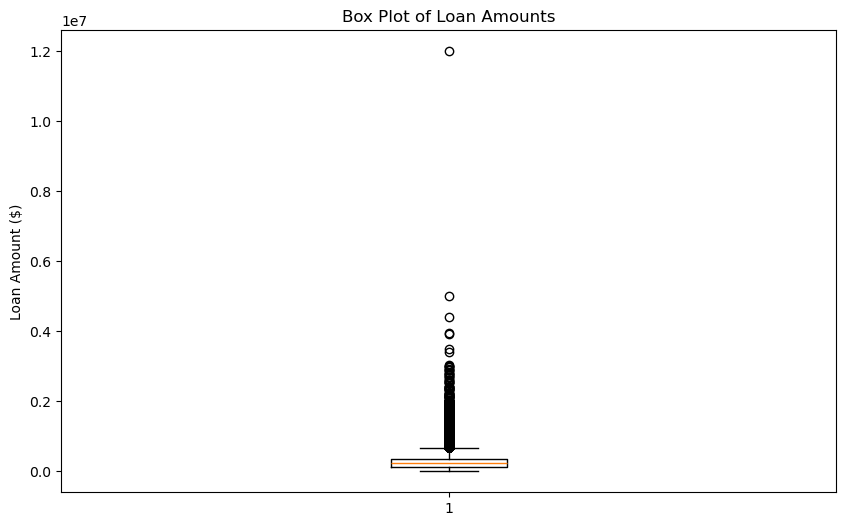


Outlier Analysis:
Upper threshold for outliers: $675,000.00
Number of outliers: 2,306
Percentage of outliers: 2.9%

Summary statistics of outlier loans:
count         $2,306.00
mean        $969,917.61
std         $465,823.85
min         $685,000.00
25%         $725,000.00
50%         $805,000.00
75%       $1,035,000.00
max      $12,005,000.00
Name: loan_amount, dtype: object


In [37]:
# Create box plot for loan_amount
plt.figure(figsize=(10,6))
plt.boxplot(df_cleaned['loan_amount'], whis=1.5)
plt.title('Box Plot of Loan Amounts')
plt.ylabel('Loan Amount ($)')
plt.show()

# Calculate outlier thresholds
Q1 = df_cleaned['loan_amount'].quantile(0.25)
Q3 = df_cleaned['loan_amount'].quantile(0.75)
IQR = Q3 - Q1
upper_threshold = Q3 + 1.5*IQR

# Count outliers
outliers = df_cleaned[df_cleaned['loan_amount'] > upper_threshold]
outlier_count = len(outliers)

print(f"\nOutlier Analysis:")
print(f"Upper threshold for outliers: ${upper_threshold:,.2f}")
print(f"Number of outliers: {outlier_count:,}")
print(f"Percentage of outliers: {(outlier_count/total_records)*100:.1f}%")

# Display summary statistics of outliers
print("\nSummary statistics of outlier loans:")
print(outliers['loan_amount'].describe().apply(lambda x: f"${x:,.2f}"))


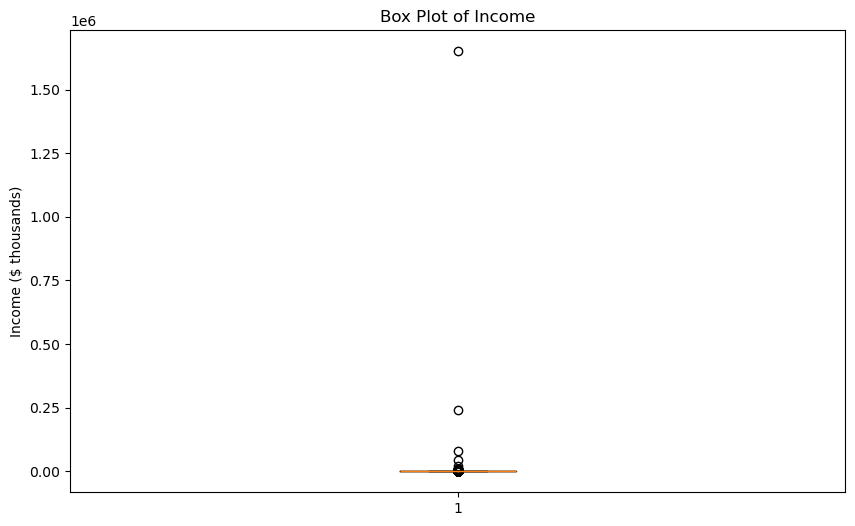


Income Outlier Analysis:
Upper threshold for income outliers: $276,000.00
Number of income outliers: 4,944
Percentage of income outliers: 6.3%

Summary statistics of outlier incomes:
count        $4,944,000.00
mean           $900,069.17
std         $23,759,419.17
min            $277,000.00
25%            $312,000.00
50%            $367,000.00
75%            $500,000.00
max      $1,651,000,000.00
Name: income, dtype: object


In [38]:
# Create box plot for income
plt.figure(figsize=(10,6))
plt.boxplot(df_cleaned['income'], whis=1.5)
plt.title('Box Plot of Income')
plt.ylabel('Income ($ thousands)')
plt.show()

# Calculate outlier thresholds for income
Q1_income = df_cleaned['income'].quantile(0.25)
Q3_income = df_cleaned['income'].quantile(0.75)
IQR_income = Q3_income - Q1_income
upper_threshold_income = Q3_income + 1.5*IQR_income

# Count income outliers
income_outliers = df_cleaned[df_cleaned['income'] > upper_threshold_income]
income_outlier_count = len(income_outliers)

print(f"\nIncome Outlier Analysis:")
print(f"Upper threshold for income outliers: ${upper_threshold_income*1000:,.2f}")
print(f"Number of income outliers: {income_outlier_count:,}")
print(f"Percentage of income outliers: {(income_outlier_count/total_records)*100:.1f}%")

# Display summary statistics of income outliers
print("\nSummary statistics of outlier incomes:")
print(income_outliers['income'].describe().apply(lambda x: f"${x*1000:,.2f}"))


In [40]:
# Export cleaned dataframe to CSV
df_cleaned.to_csv('Cleaned_loan_data_for_model.csv', index=False)
print("\nCleaned data exported to 'Data Cleaning/cleaned_loan_data.csv'")



Cleaned data exported to 'Data Cleaning/cleaned_loan_data.csv'
